# Customer Segmentation Using Clustering

In [87]:
import pandas as pd

# Load your dataset (replace 'data.csv' with your actual file path)
data = pd.read_csv(r'C:\Users\majji\Downloads\Data (3)\Data\Dataset.csv')

# Basic inspection of the data
print(data.shape)
print(data.info())
print(data.describe())


(8950, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  


# Customer Balance:
Average balance is around 1564.47, but it varies widely (from 0 to 19043.14).
The high standard deviation (2081.53) indicates significant differences among customers.
Purchasing Behavior:

Customers have an average of 1003.20 in purchases, but some make huge purchases (up to 49039.57).
One-off purchases average about 592.44; interestingly, some customers don’t engage in these at all.

# Cash Advances:
Average cash advance is 978.87, but again, there are outliers, with a max of 47137.21.
The cash advance frequency is low (0.135), showing that many customers don’t often use this option.

# Payment Behavior:

On average, customers make payments of 1733.14, with a max payment of 50721.48. Some seem to pay off their balances completely!
The MINIMUM_PAYMENTS data has some missing values, which could indicate inconsistencies in reporting or payment behavior.

# Credit Limits:
Average credit limit sits at 4494.45, with a max of 30000. This could reflect different customer segments or creditworthiness.

# Tenure:
Average tenure is around 11.52 months. Most customers seem to stick around for a decent amount of time.

# Correlations to Explore:
It’d be worth checking if higher purchases lead to higher payments or how credit limits relate to balances.
Also, looking at the link between cash advances and purchases could reveal interesting patterns.

# Segmentation Opportunities:
Consider segmenting customers based on their balance and payment behavior to tailor marketing strategies effectively.
Missing Values:

The missing values in CREDIT_LIMIT and MINIMUM_PAYMENTS need attention. How you handle them could impact your analysis.


In [63]:
from sklearn.impute import SimpleImputer

data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(), inplace=True)
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(), inplace=True)
data['CREDIT_UTILIZATION'] = data['BALANCE'] / data['CREDIT_LIMIT']
data_clean = data.drop(['CUST_ID'], axis=1)  


In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean)

In [65]:
# Handling Outliers using IQR method
Q1 = np.percentile(data_scaled, 25, axis=0)
Q3 = np.percentile(data_scaled, 75, axis=0)
IQR = Q3 - Q1

outlier_mask = (data_scaled < (Q1 - 1.5 * IQR)) | (data_scaled > (Q3 + 1.5 * IQR))
data_scaled = np.where(outlier_mask, np.nan, data_scaled) 

In [66]:

# Convert the scaled data to a DataFrame
data_scaled_df = pd.DataFrame(data_scaled, columns=data_clean.columns)

# Impute missing values with the median of each column
data_scaled_df.fillna(data_scaled_df.median(), inplace=True)

# If you want to convert it back to a NumPy array
data_scaled = data_scaled_df.values

# Display the first few rows of the scaled DataFrame
print(data_scaled_df.head())

    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099           0.518084   0.232058         -0.356934   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576     -0.466786            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                   -0.678661      

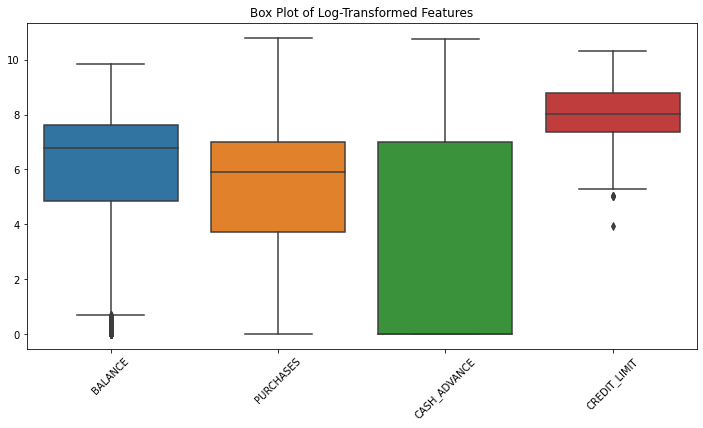

In [67]:
import numpy as np

# Apply log transformation to skewed features
skewed_features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT']
data_log_transformed = data.copy()

for feature in skewed_features:
    # Apply log transformation (adding 1 to avoid log(0) issues)
    data_log_transformed[feature] = np.log1p(data_log_transformed[feature])

# Visualize the distribution of log-transformed data using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_log_transformed[skewed_features])
plt.title("Box Plot of Log-Transformed Features")
plt.xticks(rotation=45)
plt.show()

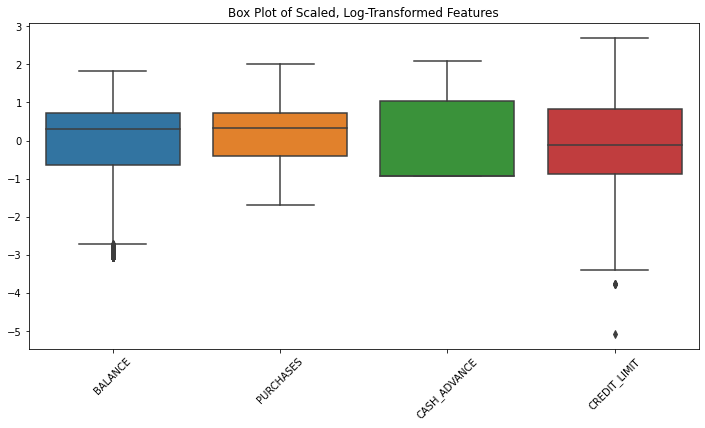

In [68]:
# Re-scale the log-transformed data
scaled_data_log_transformed = scaler.fit_transform(data_log_transformed.drop('CUST_ID', axis=1))

# Visualize the scaled, log-transformed data
plt.figure(figsize=(12, 6))
sns.boxplot(data=pd.DataFrame(scaled_data_log_transformed, columns=data_log_transformed.columns[1:])[skewed_features])
plt.title("Box Plot of Scaled, Log-Transformed Features")
plt.xticks(rotation=45)
plt.show()

Explained variance ratio: [0.39691399 0.1765147 ]


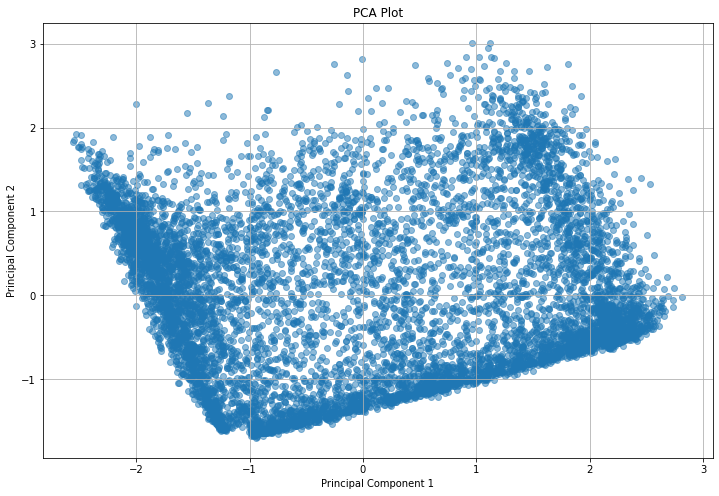

In [69]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming data_scaled is already defined
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)

# Create a larger figure
plt.figure(figsize=(12, 8))  # Set the width and height as desired
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.5)
plt.title('PCA Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)  # Optional: add grid for better readability
plt.show()

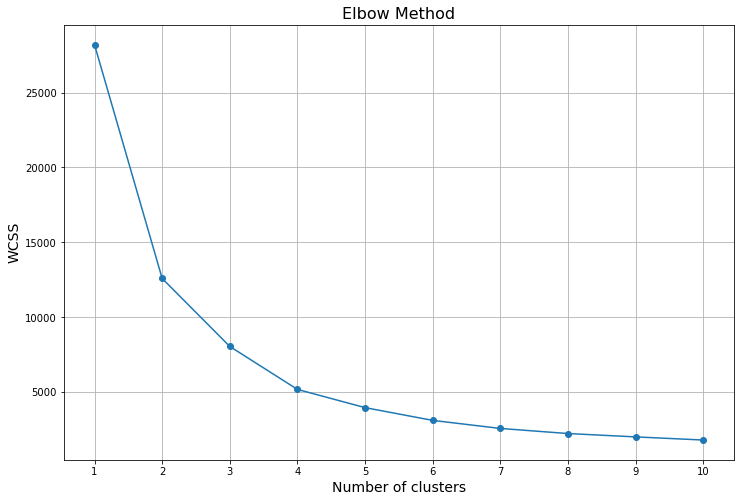

In [70]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)

# Create a larger figure
plt.figure(figsize=(12, 8))  # Set the width and height as desired
plt.plot(range(1, 11), wcss, marker='o')  # Add markers to the plot
plt.title('Elbow Method', fontsize=16)
plt.xlabel('Number of clusters', fontsize=14)
plt.ylabel('WCSS', fontsize=14)
plt.grid(True)  # Optional: add grid for better readability
plt.xticks(range(1, 11))  # Ensure x-ticks are integers from 1 to 10
plt.show()

In [71]:
# Apply K-means with optimal clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(data_pca)

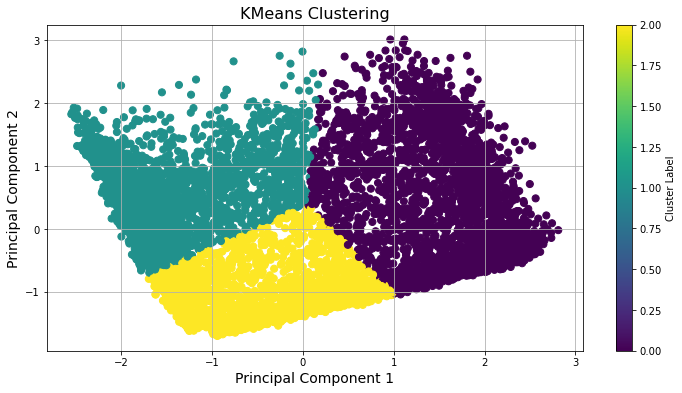

In [72]:
import matplotlib.pyplot as plt

# Create a larger figure for KMeans clustering
plt.figure(figsize=(12, 6))

# KMeans Clustering Plot
plt.subplot(1, 1, 1) 
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters_kmeans, cmap='viridis', s=50)  # Increase point size with s parameter
plt.title('KMeans Clustering', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()


In [76]:
from sklearn.metrics import silhouette_score

# Calculate and print the Silhouette Score
silhouette_kmeans = silhouette_score(data_pca, clusters_kmeans)
print(f"Silhouette Score for KMeans: {silhouette_kmeans:.4f}")


Silhouette Score for KMeans: 0.4682


In [98]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Assuming 'original_data' is your pre-processed DataFrame

# Perform PCA
pca = PCA(n_components=2)  # Adjust the number of components as needed
data_pca1 = pca.fit_transform(data_scaled)

# Convert PCA result (numpy array) back to a DataFrame
data_pca1 = pd.DataFrame(data_pca1, columns=['PC1', 'PC2'])

# Apply K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(data_pca1)

# Add the cluster labels to your DataFrame
data_pca1['Cluster'] = clusters_kmeans

# Ensure that data_pca is now a DataFrame
print(type(data_pca1))  # This should output <class 'pandas.core.frame.DataFrame'>

# Now you can proceed with further analysis
# For example, calculate the mean of each feature for each cluster
cluster_profile = data_pca1.groupby('Cluster').mean()

# Display the cluster profile
print(cluster_profile)

<class 'pandas.core.frame.DataFrame'>
              PC1       PC2
Cluster                    
0       -1.011269 -0.588792
1       -0.130733  1.036623
2        1.285141 -0.472176


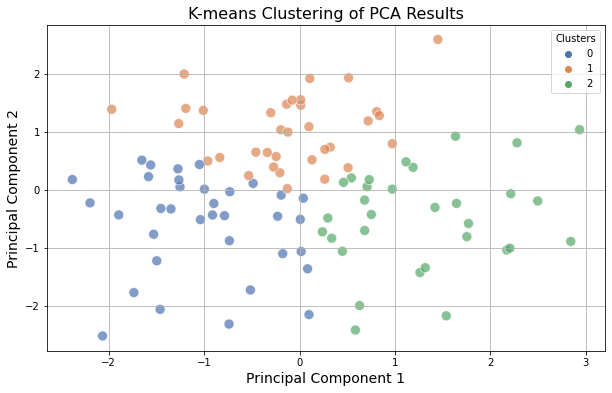

In [100]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Use seaborn to create a scatter plot
sns.scatterplot(data=data_pca1, x='PC1', y='PC2', hue='Cluster', palette='deep', s=100, alpha=0.7)

# Adding titles and labels
plt.title('K-means Clustering of PCA Results', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(title='Clusters')
plt.grid(True)

# Show the plot
plt.show()

# Cluster Profiling
To provide a detailed description of each segment based on the cluster means you've calculated:

# Cluster 0: 
Characterized by lower values in both principal components (PC1 and PC2). This might indicate a segment with generally lower activity or lower values in the original features that contribute most significantly to these components.
# Cluster 1: 
Has a higher average in PC2 but close to average in PC1. This could imply a segment that scores high on features strongly correlated with PC2, possibly indicating specific behaviors or characteristics that differentiate them from others.
# Cluster 2: 
Shows higher scores in PC1 and slightly lower in PC2, suggesting strong presence in the features associated with PC1 and below average in those associated with PC2. This segment could represent customers who are particularly strong in certain attributes while average or lower in others.
# Marketing Strategy Recommendations
Based on the cluster profiles:

#Based on the insights, here are my key recommendations:

Cluster 0: Encourage higher spending with tailored rewards programs and incentives.
Cluster 1: Strengthen loyalty by offering cashback or personalized offers to maintain their consistent spending habits.
Cluster 2: Provide financial advisory services and custom payment plans to manage credit risk and reduce the likelihood of default.